In [1]:
# Install scikit-learn if first time

#!pip install scikit_learn

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

### Logistic Regression Model

- Estimates the probability that an input belongs to a particular class (e.g., 0 or 1)

In [2]:
# Load the dataset
df = pd.read_csv('Clean_data.csv')

In [3]:
# Drop the ID column
df.drop(columns = ['ID'], inplace = True)

In [4]:
# Label Encoding for categorical datasets

#Select categorical columns
categorical_columns = df.select_dtypes(include = 'O').columns

# Initialize LabelEncoder instance
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the df
df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0,3,0,0,0,0,0,1,116500,3.99,...,3,758,0,0,1,98.728814,3,1,1,45.0
1,0,2,0,1,0,0,0,0,206500,3.99,...,2,552,1,3,1,75.135870,0,1,1,39.0
2,0,2,1,0,0,0,0,1,406500,4.56,...,3,834,0,1,1,80.019685,3,1,0,46.0
3,0,2,0,0,3,0,0,1,456500,4.25,...,3,587,0,2,0,69.376900,0,1,0,42.0
4,0,1,1,0,0,0,0,1,696500,4.00,...,1,602,1,0,0,91.886544,0,1,0,39.0


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.755
Confusion Matrix:
 [[33687     0]
 [10908     6]]
Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86     33687
           1       1.00      0.00      0.00     10914

    accuracy                           0.76     44601
   macro avg       0.88      0.50      0.43     44601
weighted avg       0.82      0.76      0.65     44601



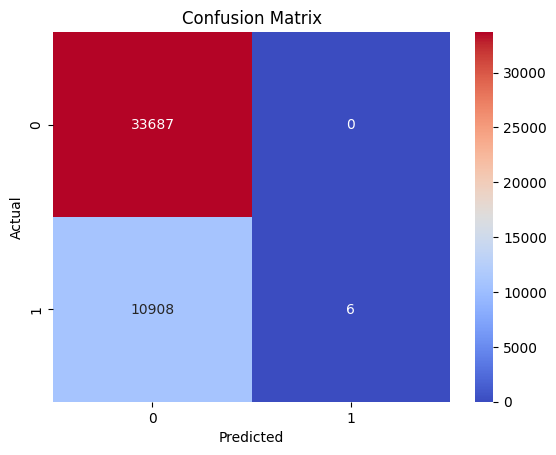

In [6]:
# Define features and target variables
X = df.drop('Status', axis = 1)
y = df['Status']

# Split the data into training and testing tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# create an Instance of the logistic regression class
model = LogisticRegression()

#  the model
model.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)

# Print the results
print("Accuracy:", round(accuracy,3))

# cofusion Matrix

print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Classification Report
print("Report:\n", class_report)

### Findings

* The model did a great job of identifying 33,687 negative instances (class 0) correctly.
* The model never falsely predicted positive (class 1) when it should have been predicted negative (class 0).
* The model did poorly at predicting positive cases, missing 10, 908.
* The model correctly identified 6 positive instances (class 1), which is far too low.

* **Accuracy:** Overall accuracy of the model is 76%. This means the model is correctly predicting 76% of all cases, but accuracy alone doesn't tell the whole story especially when the classes are imbalanced.

##### Class 0 (Negative Class):
* **Precision:** Out of all the instances that the model predicted 0, 76% were actually reasonable but not perfect
  
* **Recall:** Out of the actual instances of class 0, the model predicted 100% of them correctly. This means the model is very strong at detecting   negatives.
  
* **F1-Score:** Since the recall is perfect the F1-Score is fairly high at 0.86

##### Class 1 (Positive Class):
* **Precision:** Out of all the instances the model predicted class 1, 100% were actually class 1. However since it predicted class 1 correctly 6 times, it is not as meaningful.
  
*  **Recall:** The model only identified 0% of actual class 1 cases correctly meaning the model has completely failed to identify positive cases.
  
*  **F1-score:** Since F1-score is zero, F1-score is also zero.

### Insights
* **Class Imbalance:** The data seems highly imbalanced, there are 33,687 instances of negative class (0) compared to only 10,914 positive class instance (1). The model is strongly biased towards predicting the majority class (0) hence poor recall for class 1.
  
* **Poor positive case prediction:** The model is not detecting class 1 at all (only 6 instances), leading to a recall of 0 for class 1. THis is major issue since we are predicting class 1 (default).

### Decision Tree classifier

In [18]:
# import library
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
dt_y_pred = dt_classifier.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_classification_rep = classification_report(y_test, dt_y_pred)

print("Accuracy:", dt_accuracy)
print("Confusion Matrix:\n", dt_conf_matrix)
print("Classification Report:\n", dt_classification_rep)

Accuracy: 0.9998878948902491
Confusion Matrix:
 [[33686     1]
 [    4 10910]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33687
           1       1.00      1.00      1.00     10914

    accuracy                           1.00     44601
   macro avg       1.00      1.00      1.00     44601
weighted avg       1.00      1.00      1.00     44601



### Random Forest

In [6]:
# Import necessary Library
from sklearn.ensemble import RandomForestClassifier

In [7]:
# Create a random forest model with class weights balanced
random_forest = RandomForestClassifier(class_weight = 'balanced', random_state = 42)

# Fit the model to the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [8]:
# Make predictions
rf_y_pred = random_forest.predict(X_test)

In [9]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_classification_rep = classification_report(y_test, rf_y_pred)

# Printing the results
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)
print("Classification Report:\n", rf_classification_rep)

Accuracy: 0.9999103159121993
Confusion Matrix:
 [[33686     1]
 [    3 10911]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33687
           1       1.00      1.00      1.00     10914

    accuracy                           1.00     44601
   macro avg       1.00      1.00      1.00     44601
weighted avg       1.00      1.00      1.00     44601



### Decision Trees and Random Forest Findings
* The decision trees model falsely predicted only 1 instance of negative class as positive and only 4 instances of positive class as negative.
  
* The random forest model shown an improvement by only predicting 3 instances of positive class as negative.
  
* Both the decision tree and random forest show very high accuracy but random forest model has a marginally higher accuracy. This improvement in accuracy is typical because random forest combine multiple decision trees and provide better generalization by reducing overfitting and variance compared to a single decision tree.
  
* Both models have achieved a perfect classification performance across all metrics for both classes. This suggest that both models are performing exceptionally well on this dataset.

### Gradient Boosting

In [12]:
# import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
# Initializa the gradient boosting model
gradient_boosting = GradientBoostingClassifier(random_state = 42)

# Fit the model to the training data
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [14]:
# Make Predictions
gb_y_pred = gradient_boosting.predict(X_test)

In [15]:
# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)
gb_classification_rep = classification_report(y_test, gb_y_pred)

# Printing the results
print("Accuracy:", gb_accuracy)
print("Confusion Matrix:\n", gb_conf_matrix)
print("Classification Report:\n", gb_classification_rep)

Accuracy: 0.9999327369341494
Confusion Matrix:
 [[33686     1]
 [    2 10912]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33687
           1       1.00      1.00      1.00     10914

    accuracy                           1.00     44601
   macro avg       1.00      1.00      1.00     44601
weighted avg       1.00      1.00      1.00     44601



### Findings

* GB model has a higher accuracy compared to the random forest model. While the difference is very samll, Gradient boosting shows marginal improvement in performance.

* GB tends to capture more complex patterns pottentially leading to better overall performance.

* GB improves upon previous mistakes itteratively, which could help the model handle less obvious patterns or imbalances better than RF

#### Feature Importance

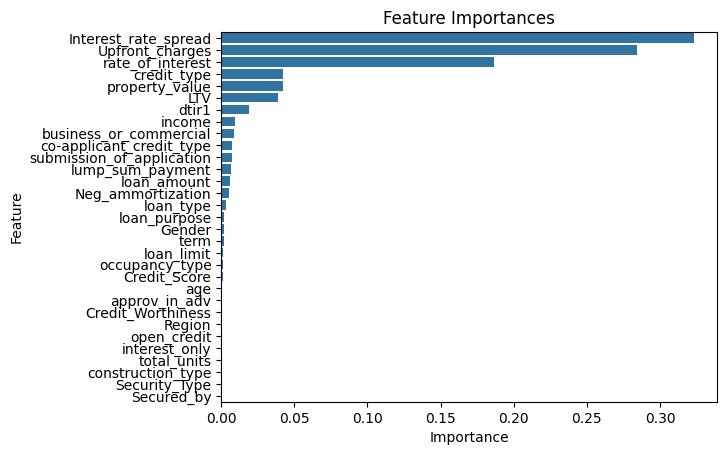

In [19]:
# Get feature importance from the already trained model
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
features = X.columns

# Create a dataframe 
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the barplot
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()